In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(font_scale=1.3)

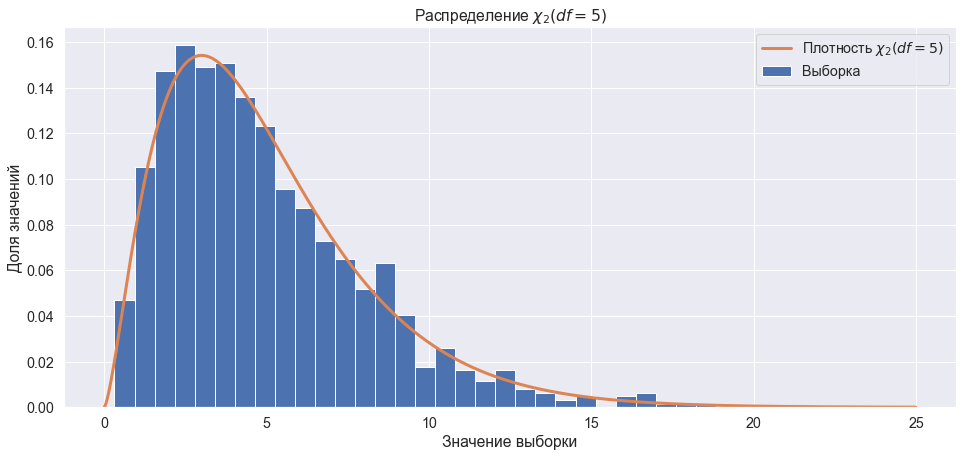

In [6]:
# для генерации выборки будем использовать распределение хи-квадрат с 5 степенями свободы
df = 5
sample_size = 10 ** 3
sample = sps.chi2(df=df).rvs(sample_size) # генерируем выборку

x = np.arange(0, 25, 0.01)
pdf = sps.chi2(df=df).pdf(x) # вычисляем плотность распределения

# отрисовка
plt.figure(figsize=(16, 7)) # задачем размеры графика
plt.title('Распределение $\chi_2(df={})$'.format(df)) # надпись
plt.hist(sample, density=True, bins=30, label='Выборка') # гистограмма
plt.plot(x, pdf, lw=3, label='Плотность $\chi_2(df={})$'.format(df)) # плотность
plt.xlabel('Значение выборки') # подпись оси Ox
plt.ylabel('Доля значений') # подпись оси Oy
plt.legend() # отрисовка легенды
plt.show()

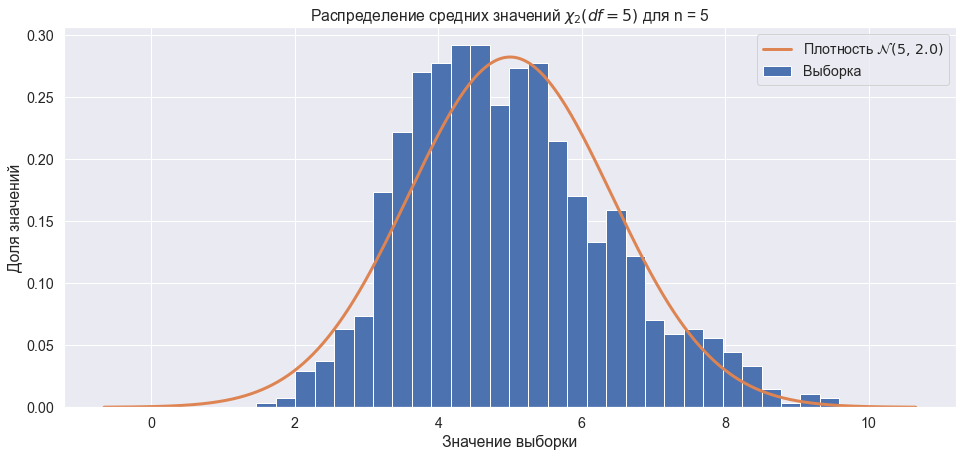

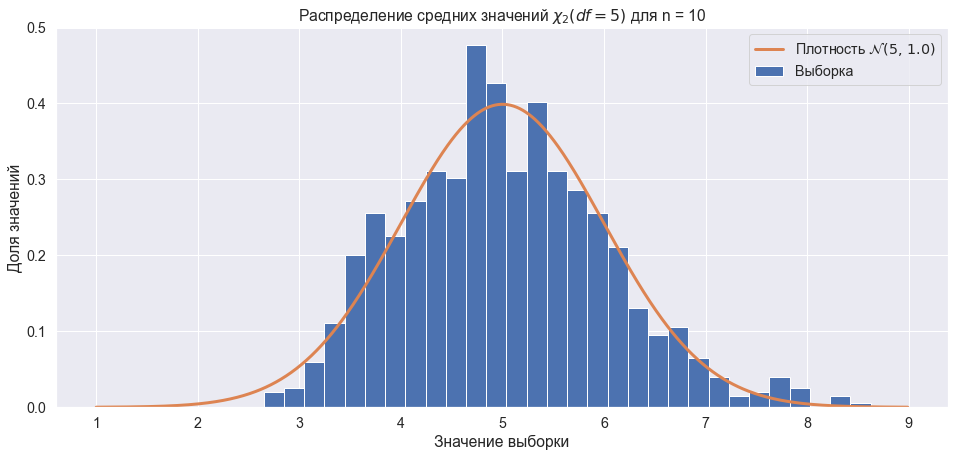

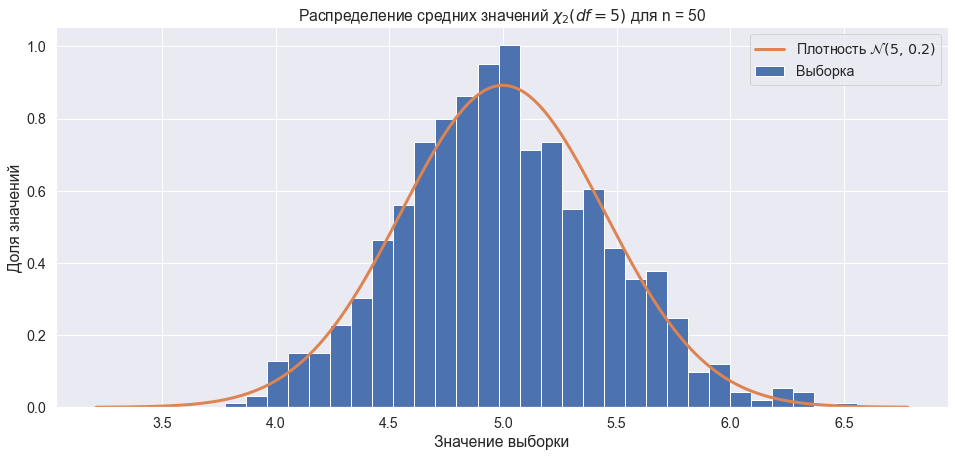

In [15]:
n_values = [5, 10, 50] # задаем вектор для необходимых n

for n in n_values:
    sample = sps.chi2(df=df).rvs((sample_size, n)) # генерируем выборку размера 1000 и объема n
    mean = sample.mean(axis=1) #считаем среднее

    chi2_mean = df # теоретическое среднее
    chi2_variance = 2 * df # теоретическая дисперсия

    x = np.arange(chi2_mean - 4 * np.sqrt(chi2_variance / n), chi2_mean + 4 * np.sqrt(chi2_variance / n), 0.01)
    pdf = sps.norm(loc=chi2_mean, scale=np.sqrt(chi2_variance / n)).pdf(x) # плотность нормального распределения

    # отрисовка
    plt.figure(figsize=(16, 7)) # задачем размеры графика
    plt.title('Распределение средних значений $\chi_2(df={})$ для n = {}'.format(df, n)) # надпись
    plt.hist(mean, density=True, bins=30, label='Выборка') # гистограмма
    plt.plot(x, pdf, lw=3, label='Плотность $\mathcal{{N}}({},\,{})$'.format(chi2_mean, chi2_variance / n)) # плотность
    plt.xlabel('Значение выборки') # подпись оси Ox
    plt.ylabel('Доля значений') # подпись оси Oy
    plt.legend() # отрисовка легенды
    plt.show()

**Выводы:** 
* С ростом $n$ различия на хвостах между плотностью нормального распределения и выборочным средним становятся менее заметным.
* Кроме того, с увеличением $n$ распределение данных становится более симметричным относительно теоретического среднего, больше значений сосредоточены около него.
* Качество аппроксимации выборочных средних с помощью нормального распределения увеличивается с ростом $n$.